In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
cpu_df = pd.read_csv('../results/cycle_both.csv')

cpu_df['cpu_percent'] = percent_scaling(cpu_df['cpu_percent'])
cpu_df['virtual_memory'] = percent_scaling(cpu_df['virtual_memory'])
cpu_df['adc_voltage_norm'] = min_max_scaling(cpu_df['adc_voltage'])

cpu_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-26 14:06:51.515135,0.184,0.226,0.163130,0.196749
1,2023-04-26 14:06:51.537342,0.000,0.226,0.121504,0.054320
2,2023-04-26 14:06:51.553483,0.000,0.226,0.115879,0.035073
3,2023-04-26 14:06:51.569508,0.000,0.226,0.117504,0.040633
4,2023-04-26 14:06:51.585658,0.143,0.226,0.116129,0.035928
...,...,...,...,...,...
4295,2023-04-26 14:08:03.998038,0.000,0.156,0.113003,0.025235
4296,2023-04-26 14:08:04.014044,0.143,0.156,0.107878,0.007699
4297,2023-04-26 14:08:04.030002,0.000,0.156,0.108253,0.008982
4298,2023-04-26 14:08:04.046017,0.143,0.156,0.107753,0.007271


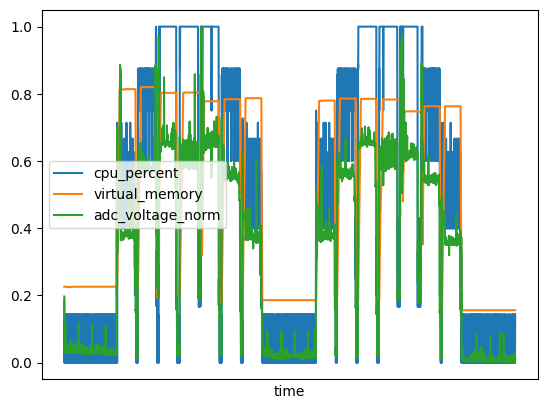

In [4]:
cpu_df_plot = cpu_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
cpu_df_plot.get_figure().savefig('cpu_stress_test.pdf', format='pdf')

In [5]:
cpu_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent,1.000000,0.846077,0.966865,0.966865
virtual_memory,0.846077,1.000000,0.852707,0.852707
adc_voltage,0.966865,0.852707,1.000000,1.000000
adc_voltage_norm,0.966865,0.852707,1.000000,1.000000


In [6]:
cpu_pca = PCA(n_components=4)
cpu_pca.fit(cpu_df.drop('time', axis=1))
cpu_pca.components_

array([[ 7.22234670e-01,  4.77231003e-01,  1.40437892e-01,
         4.80525598e-01],
       [ 4.30939928e-01, -8.76644271e-01,  6.00252899e-02,
         2.05383945e-01],
       [-5.40987856e-01, -6.11996052e-02,  2.35303634e-01,
         8.05120455e-01],
       [-0.00000000e+00, -2.92509993e-16,  9.59847052e-01,
        -2.80523862e-01]])

In [7]:
mem_df = pd.read_csv('../results/cycle_both.csv')

mem_df['cpu_percent'] = percent_scaling(mem_df['cpu_percent'])
mem_df['virtual_memory'] = percent_scaling(mem_df['virtual_memory'])
mem_df['adc_voltage_norm'] = min_max_scaling(mem_df['adc_voltage'])

mem_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-26 14:06:51.515135,0.184,0.226,0.163130,0.196749
1,2023-04-26 14:06:51.537342,0.000,0.226,0.121504,0.054320
2,2023-04-26 14:06:51.553483,0.000,0.226,0.115879,0.035073
3,2023-04-26 14:06:51.569508,0.000,0.226,0.117504,0.040633
4,2023-04-26 14:06:51.585658,0.143,0.226,0.116129,0.035928
...,...,...,...,...,...
4295,2023-04-26 14:08:03.998038,0.000,0.156,0.113003,0.025235
4296,2023-04-26 14:08:04.014044,0.143,0.156,0.107878,0.007699
4297,2023-04-26 14:08:04.030002,0.000,0.156,0.108253,0.008982
4298,2023-04-26 14:08:04.046017,0.143,0.156,0.107753,0.007271


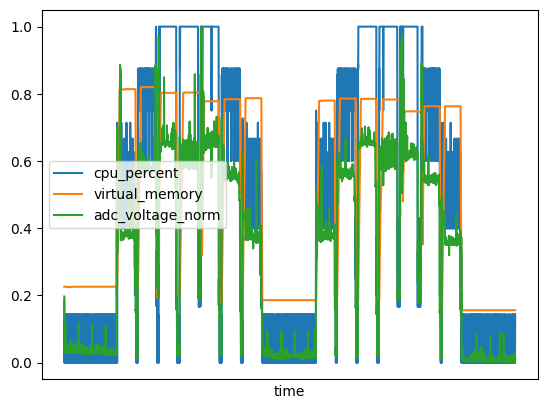

In [8]:
mem_df_plot = mem_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
mem_df_plot.get_figure().savefig('mem_stress_test.pdf', format='pdf')

In [9]:
mem_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent,1.000000,0.846077,0.966865,0.966865
virtual_memory,0.846077,1.000000,0.852707,0.852707
adc_voltage,0.966865,0.852707,1.000000,1.000000
adc_voltage_norm,0.966865,0.852707,1.000000,1.000000


In [10]:
mem_pca = PCA(n_components=4)
mem_pca.fit(mem_df.drop('time', axis=1))
mem_pca.components_

array([[ 7.22234670e-01,  4.77231003e-01,  1.40437892e-01,
         4.80525598e-01],
       [ 4.30939928e-01, -8.76644271e-01,  6.00252899e-02,
         2.05383945e-01],
       [-5.40987856e-01, -6.11996052e-02,  2.35303634e-01,
         8.05120455e-01],
       [-0.00000000e+00, -2.92509993e-16,  9.59847052e-01,
        -2.80523862e-01]])

In [11]:
both_df = pd.read_csv('../results/cycle_both_ina3221.csv')

both_df['cpu_percent'] = percent_scaling(both_df['cpu_percent'])
both_df['virtual_memory'] = percent_scaling(both_df['virtual_memory'])
both_df['adc_voltage_norm'] = min_max_scaling(both_df['adc_voltage'])

both_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-09-20 15:23:47.019652,0.237,0.220,0.2036,0.219409
1,2023-09-20 15:23:47.121838,0.000,0.220,0.1432,0.060127
2,2023-09-20 15:23:47.223856,0.000,0.220,0.1300,0.025316
3,2023-09-20 15:23:47.325809,0.024,0.220,0.1264,0.015823
4,2023-09-20 15:23:47.427818,0.000,0.220,0.1260,0.014768
...,...,...,...,...,...
425,2023-09-20 15:24:49.811235,0.000,0.188,0.1224,0.005274
426,2023-09-20 15:24:49.913940,0.000,0.188,0.1236,0.008439
427,2023-09-20 15:24:50.016594,0.000,0.188,0.1244,0.010549
428,2023-09-20 15:24:50.119286,0.000,0.188,0.1220,0.004219


In [12]:
both_df['datetime'] = pd.to_datetime(both_df['time'])

dt_origin = both_df['datetime'][0]
both_df['delta'] = both_df['datetime'].apply(lambda dt: (dt - dt_origin).total_seconds())

both_df = both_df.set_index(pd.DatetimeIndex(both_df['datetime']))
both_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm,datetime,delta
datetime,,,,,,,
2023-09-20 15:23:47.019652,2023-09-20 15:23:47.019652,0.237,0.220,0.2036,0.219409,2023-09-20 15:23:47.019652,0.000000
2023-09-20 15:23:47.121838,2023-09-20 15:23:47.121838,0.000,0.220,0.1432,0.060127,2023-09-20 15:23:47.121838,0.102186
2023-09-20 15:23:47.223856,2023-09-20 15:23:47.223856,0.000,0.220,0.1300,0.025316,2023-09-20 15:23:47.223856,0.204204
2023-09-20 15:23:47.325809,2023-09-20 15:23:47.325809,0.024,0.220,0.1264,0.015823,2023-09-20 15:23:47.325809,0.306157
2023-09-20 15:23:47.427818,2023-09-20 15:23:47.427818,0.000,0.220,0.1260,0.014768,2023-09-20 15:23:47.427818,0.408166
...,...,...,...,...,...,...,...
2023-09-20 15:24:49.811235,2023-09-20 15:24:49.811235,0.000,0.188,0.1224,0.005274,2023-09-20 15:24:49.811235,62.791583
2023-09-20 15:24:49.913940,2023-09-20 15:24:49.913940,0.000,0.188,0.1236,0.008439,2023-09-20 15:24:49.913940,62.894288
2023-09-20 15:24:50.016594,2023-09-20 15:24:50.016594,0.000,0.188,0.1244,0.010549,2023-09-20 15:24:50.016594,62.996942


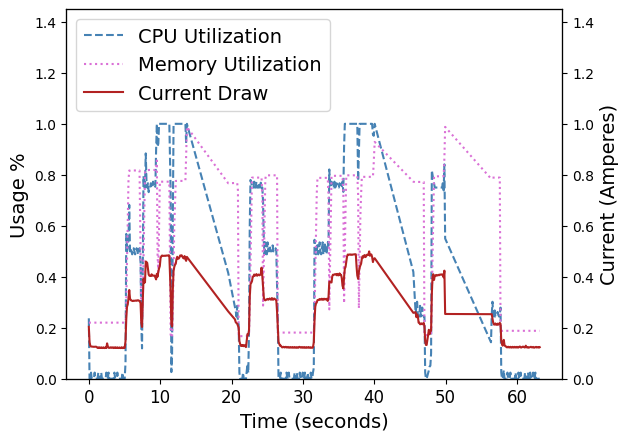

In [13]:
ax = both_df.plot(x='delta', y='cpu_percent', color='steelblue', linestyle='dashed')
ax.set_ylim([0, 1.45])
ax.set(xlabel='Time (seconds)', ylabel='Usage %')
ax.get_legend().remove()

ax2 = ax.twinx()
ax2.yaxis.set_label_position('right')
ax2.set(ylabel='')
both_df.plot(ax=ax2, x='delta', y='virtual_memory', color='orchid', linestyle='dotted')
ax2.set_ylim([0, 1.45])
ax2.get_yaxis().set_visible(False)
ax2.get_legend().remove()

ax3 = ax2.twinx()
both_df.plot(ax=ax3, x='delta', y='adc_voltage', color='firebrick')
ax3.set_ylim([0, 1.45])
ax3.set(ylabel='Current (Amperes)')
ax3.get_legend().remove()

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
ax3.yaxis.label.set_size(14)

ax.tick_params(axis="x", labelsize=12)
ax2.tick_params(axis="x", labelsize=12)
ax3.tick_params(axis="x", labelsize=12)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, ['CPU Utilization', 'Memory Utilization', 'Current Draw'], loc=2, prop={'size': 14})

ax.get_figure().savefig('merged_stress_test.pdf', format='pdf')

#### both_df.drop('time', axis=1).corr()

In [14]:
fftw_df = pd.read_csv('../results/fftw.csv')

fftw_df['cpu_percent_0'] = percent_scaling(fftw_df['cpu_percent_0'])
fftw_df['cpu_percent_1'] = percent_scaling(fftw_df['cpu_percent_1'])
fftw_df['cpu_percent_2'] = percent_scaling(fftw_df['cpu_percent_2'])
fftw_df['cpu_percent_3'] = percent_scaling(fftw_df['cpu_percent_3'])
fftw_df['virtual_memory'] = percent_scaling(fftw_df['virtual_memory'])
fftw_df['adc_voltage_norm'] = min_max_scaling(fftw_df['adc_voltage'])

fftw_df

,time,cpu_percent_0,cpu_percent_1,cpu_percent_2,cpu_percent_3,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-09-07 16:41:40.623437,0.0,0.0,0.0,0.0,0.220,0.456639,0.477132
1,2023-09-07 16:41:40.733764,0.0,0.0,0.0,1.0,0.220,0.469514,0.604450
2,2023-09-07 16:41:40.844216,0.0,0.0,0.0,1.0,0.220,0.429138,0.205192
3,2023-09-07 16:41:40.954665,0.0,0.0,0.0,0.0,0.220,0.471639,0.625464
4,2023-09-07 16:41:41.065090,0.0,0.0,0.0,0.0,0.220,0.449764,0.409147
...,...,...,...,...,...,...,...,...
945,2023-09-07 16:43:25.036758,0.0,0.0,0.0,0.0,0.223,0.409888,0.014833
946,2023-09-07 16:43:25.146801,0.0,0.0,0.0,0.0,0.223,0.471639,0.625464
947,2023-09-07 16:43:25.256804,0.0,0.0,0.0,0.0,0.223,0.424888,0.163164
948,2023-09-07 16:43:25.366837,0.0,0.0,0.0,0.0,0.223,0.437888,0.291718


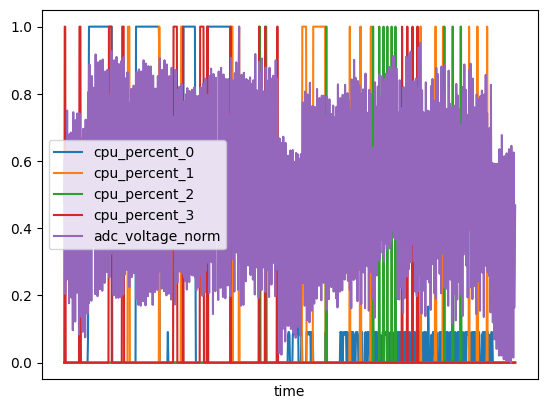

In [15]:
fftw_df.plot(x='time', y=['cpu_percent_0','cpu_percent_1','cpu_percent_2','cpu_percent_3','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [16]:
fftw_df.drop('time', axis=1).corr()

,cpu_percent_0,cpu_percent_1,cpu_percent_2,cpu_percent_3,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent_0,1.000000,-0.129342,-0.067557,0.006761,-0.147778,0.061272,0.061272
cpu_percent_1,-0.129342,1.000000,-0.035974,-0.058731,-0.005328,0.005759,0.005759
cpu_percent_2,-0.067557,-0.035974,1.000000,-0.029747,-0.001314,-0.000289,-0.000289
cpu_percent_3,0.006761,-0.058731,-0.029747,1.000000,-0.071312,0.017396,0.017396
virtual_memory,-0.147778,-0.005328,-0.001314,-0.071312,1.000000,-0.004015,-0.004015
adc_voltage,0.061272,0.005759,-0.000289,0.017396,-0.004015,1.000000,1.000000
adc_voltage_norm,0.061272,0.005759,-0.000289,0.017396,-0.004015,1.000000,1.000000


In [17]:
fftw_pca = PCA(n_components=4)
fftw_pca.fit(fftw_df.drop('time', axis=1))
fftw_pca.components_

array([[ 0.98706443, -0.14174804, -0.02474843,  0.01044274, -0.02610181,
         0.00652715,  0.06454341],
       [ 0.07536777,  0.79391234, -0.02543244, -0.1062739 , -0.00503062,
         0.05969921,  0.59033266],
       [ 0.13437885,  0.56358743, -0.02369681, -0.15447594, -0.00633727,
        -0.0804823 , -0.79584522],
       [ 0.01703307,  0.17467476, -0.04134729,  0.98127207, -0.0270922 ,
        -0.0062512 , -0.06181471]])